In [1]:
import random

In [2]:
# Load the training set
with open('../Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the testing set
with open('../Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [3]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [4]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # Check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [5]:
# Generate a random word from the list
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [6]:
# Bayesian algorithm to choose next word
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [7]:
# Training phase
training_set_size = 1000
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
            break

word #1: sling
attempt: 6
word #2: swoon
attempt: 5
word #3: unfed
attempt: 3
word #4: mocha
attempt: 2
word #5: stein
attempt: 3
word #6: grown
attempt: 3
word #7: anger
attempt: 3
word #8: banjo
attempt: 5
word #9: eying
attempt: 3
word #10: deign
attempt: 4
word #11: fetch
attempt: 5
word #12: serum
attempt: 3
word #13: hinge
attempt: 4
word #14: rotor
attempt: 4
word #15: haven
attempt: 4
word #16: drank
attempt: 5
word #17: sting
attempt: 3
word #18: movie
attempt: 3
word #19: sower
attempt: 5
word #20: flyer
attempt: 4
word #21: align
attempt: 4
word #22: cycle
attempt: 3
word #23: revue
attempt: 5
word #24: shack
attempt: 3
word #25: lying
attempt: 4
word #26: shrug
attempt: 4
word #27: again
attempt: 3
word #28: cream
attempt: 3
word #29: epoxy
attempt: 3
word #30: boxer
attempt: 7
word #31: chide
attempt: 5
word #32: horny
attempt: 3
word #33: towel
attempt: 3
word #34: dummy
attempt: 5
word #35: favor
attempt: 3
word #36: forty
attempt: 3
word #37: serif
attempt: 6
word #38: 

In [8]:
from collections import Counter

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

# Calculate the score for the word based on letter frequencies
def evaluate_word(word, letter_frequencies, repeat_penalty=5):
    word_frequencies = Counter(word.lower())
    
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('../Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
print("Word Scores:")
for word, score in sorted_words:
    print(f"{word}: {score}")

print(f"\nBest Word for the First Word in Wordle: {sorted_words[0][0]}")

Word Scores:
lathe: 40.044
react: 38.694
eclat: 36.732
stove: 36.57
fetal: 36.178
opine: 35.853
harem: 35.355999999999995
phone: 34.981
glean: 33.658
crept: 32.455999999999996
women: 31.724
mouse: 31.699999999999996
piano: 31.317999999999998
flute: 30.769
china: 30.758000000000003
vegan: 30.611
devil: 28.924
count: 28.851999999999997
boxer: 27.938000000000002
plain: 27.836
bloke: 27.498
patsy: 27.453
youth: 27.389000000000003
toxic: 26.561
owing: 25.596999999999998
scour: 25.360999999999997
scrap: 25.191999999999997
scowl: 23.000999999999998
jerky: 22.688
cling: 22.537
magic: 22.336000000000002
scamp: 21.610999999999997
clung: 18.329
filmy: 17.599
crump: 15.862000000000002
fifty: 11.312
harsh: 2.1989999999999963
sorry: -2.1530000000000022
stood: -2.884999999999998
fussy: -12.020999999999997
patty: -15.097999999999995
sheet: -16.628999999999998
cocoa: -22.699999999999996
weedy: -29.518999999999995
bezel: -32.515
penne: -56.424

Best Word for the First Word in Wordle: lathe


In [9]:
# Testing phase
testing_set_size = 500
testing_set = []
testing_set = [choose_random_word(testing_set) for _ in range(testing_set_size)]

testing_attempts = []
word = 0
the_word = None

best_starting_word = []
best_starting_word_attempts = float('inf')

for target_word in testing_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")

    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            guess = best_word
            the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            testing_attempts.append(attempts)
            if attempts < 3:
                best_starting_word.append(the_word)
            break

word #1: boast
attempt: 6
word #2: octet
attempt: 3
word #3: utter
attempt: 4
word #4: waltz
attempt: 5
word #5: react
attempt: 3
word #6: blind
attempt: 5
word #7: basil
attempt: 4
word #8: credo
attempt: 4
word #9: early
attempt: 3
word #10: pizza
attempt: 5
word #11: linen
attempt: 4
word #12: scaly
attempt: 3
word #13: ankle
attempt: 2
word #14: owing
attempt: 6
word #15: adobe
attempt: 5
word #16: petal
attempt: 4
word #17: leach
attempt: 3
word #18: crawl
attempt: 3
word #19: furor
attempt: 4
word #20: antic
attempt: 3
word #21: elite
attempt: 3
word #22: bowel
attempt: 3
word #23: using
attempt: 4
word #24: pence
attempt: 5
word #25: width
attempt: 3
word #26: stomp
attempt: 5
word #27: fiber
attempt: 3
word #28: grope
attempt: 5
word #29: bloke
attempt: 3
word #30: chord
attempt: 4
word #31: usurp
attempt: 5
word #32: matey
attempt: 4
word #33: amiss
attempt: 4
word #34: shock
attempt: 3
word #35: dirty
attempt: 3
word #36: bison
attempt: 4
word #37: spray
attempt: 4
word #38: 

In [10]:
# Print average attempts for training set and testing set
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {avg_testing_attempts:.2f}")

Average attempts during training: 4.08
Average attempts during testing: 3.90


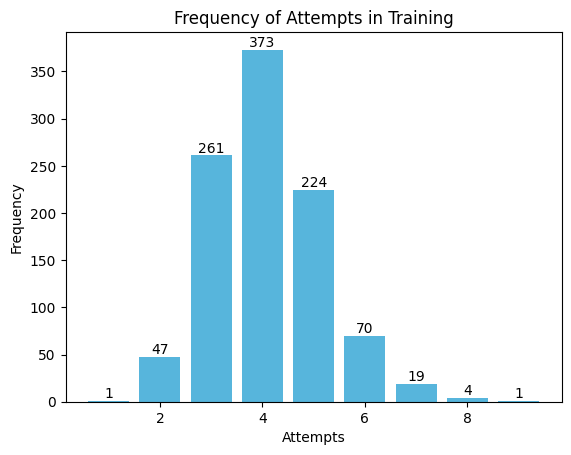

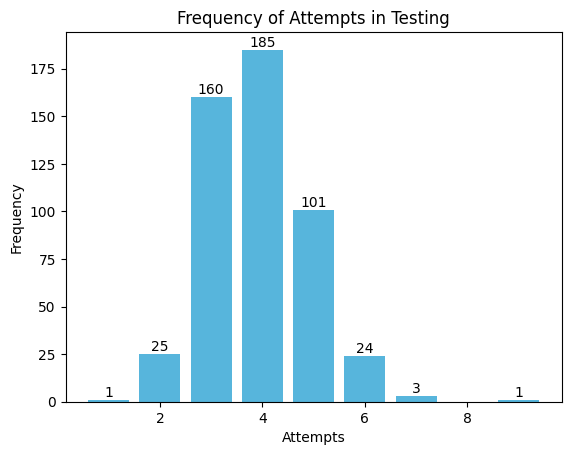

In [11]:
import matplotlib.pyplot as plt

# Training Data Graph
unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

plt.show()

# Testing Data Graph
unique_elements, counts = [], []

for item in set(testing_attempts):
    unique_elements.append(item)
    counts.append(testing_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Testing')

plt.show()

In [12]:
attempts = 0
previous_guesses = []

print("Please provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Please provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛⬛🟨⬛⬛
🟨🟨⬛⬛🟩
🟩🟩🟩🟩🟩
Congratulations! The word was 'worst'. It took 3 attempts to guess.
